In [1]:
Double_t counts;

## 1D histogram - pT

In [2]:
TFile *f1d = new TFile("~/rootFiles/pt_par.root");
TH1F *h1 = (TH1F *)f1d->Get("h_qcd_ptL");

In [3]:
f1d->ls()

TFile**		/home/llr/cms/kalipoliti/rootFiles/pt_par.root	
 TFile*		/home/llr/cms/kalipoliti/rootFiles/pt_par.root	
  OBJ: TH1F	h_qcd_ptL	parpt, l jets : 0 at: 0x7f71300f3450
  KEY: TH1F	h_qcd_ptB;1	parpt, b jets
  KEY: TH1F	h_qcd_ptC;1	parpt, c jets
  KEY: TH1F	h_qcd_ptL;1	parpt, l jets
  KEY: TH1F	h_qcd_zgL;1	zg, l jets
  KEY: TH2F	h_qcd_zgptL;1	zg, pt, ljets
  KEY: TH1F	h_qcd_etaL;1	eta, l jets
  KEY: TH1F	h_bJet_ptB;1	parpt, b jets
  KEY: TH1F	h_bJet_ptC;1	parpt, c jets
  KEY: TH1F	h_bJet_ptL;1	parpt, l jets
  KEY: TH1F	h_bJet_zgL;1	zg, l jets
  KEY: TH2F	h_bJet_zgptL;1	zg, pt, ljets
  KEY: TH1F	h_bJet_etaL;1	eta, l jets


In [10]:
TH2F *h12 = (TH2F *)h_qcd_zgptL->Clone();

In [13]:
h12->GetEntries()

(double) 73296608.000000


In [14]:
h12->GetXaxis()->SetRange(0, h12->GetNbinsX()+1);
h12->GetYaxis()->SetRange(0, h12->GetNbinsY()+1);
h12->Integral()

(double) 707431.911691


In [12]:
h12->Draw();
c1->Draw();

In [4]:
TH1F *h1n = (TH1F *)f1d->Get("h_qcd_zgL");

In [5]:
h1n->GetXaxis()->SetRange(1, h1n->GetNbinsX());
cout << "zg integral in [0.1, 0.5]: " << h1n->Integral() << endl;
h1n->GetXaxis()->SetRange(0, h1n->GetNbinsX() + 1);
cout << "zg integral in all zg range: " << h1n->Integral() << endl;

zg integral in [0.1, 0.5]: 585442
zg integral in all zg range: 704645


In [6]:
h1n->GetEntries()

(double) 73296608.000000


In [5]:
h1->GetXaxis()->SetRange(1, h1->GetNbinsX());
cout << "pt integral in [30, 300] Gev: " << h1->Integral() << endl;
h1->GetXaxis()->SetRange(0, h1->GetNbinsX() + 1);
cout << "pt integral in all pt range: " << h1->Integral() << endl;

pt integral in [30, 300] Gev: 140485
pt integral in all pt range: 566172


In [4]:
h1->GetEntries()

(double) 66116177.000000


In [31]:
counts = 0;

for (Long64_t i = 1; i < h1->GetNbinsX()+1; i++) {
    counts += h1->GetBinContent(i);
}

In [32]:
counts

(double) 166845.204517


* Counts agree with integral.

## 2D histogram - pT vs zg, pT vs rg

In [6]:
TFile *f2d = new TFile("~/rootFiles/parHistos/par_sub.root");
TH2F *h2 = (TH2F *) f2d->Get("h_qcd_zgL");
TH2F *h3 = (TH2F *) f2d->Get("h_qcd_rgL");
TH1F *h21 = (TH1F *) h2->ProjectionY()->Clone();
TH1F *h31 = (TH1F *) h3->ProjectionY()->Clone();

### pT vs zg

In [12]:
h2->GetYaxis()->FindBin(120)

(int) 19


In [14]:
h2->GetYaxis()->GetBinLowEdge(19)

(double) 120.000000


From 2D histogram:

In [28]:
h2->GetXaxis()->SetRange(0, h2->GetNbinsX()+1); // zg
h2->GetYaxis()->SetRange(1, h2->GetNbinsY()); // pt
cout << "pt integral in [30, 300] Gev: " << h2->Integral() << endl;
h2->GetXaxis()->SetRange(0, h2->GetNbinsX()+1); // zg
h2->GetYaxis()->SetRange(0, h2->GetNbinsY()+1); // pt
cout << "pt integral in all pt range: " << h2->Integral() << endl;

pt integral in [30, 300] Gev: 167546
pt integral in all pt range: 707432


In [15]:
h2->GetXaxis()->SetRange(0, h2->GetNbinsX()+1); // zg
h2->GetYaxis()->SetRange(11, 19); // pt
cout << "pt integral in [80, 120) Gev: " << h2->Integral() << endl;

pt integral in [80, 120) Gev: 2175.73


From projection into pt (y-axis):

In [26]:
h21->GetXaxis()->SetRange(1, h21->GetNbinsX()); 
cout << "pt integral in [30, 300] Gev: " << h21->Integral() << endl;
h21->GetXaxis()->SetRange(0, h21->GetNbinsX()+1);
cout << "pt integral in all pt range: " << h21->Integral() << endl;

pt integral in [30, 300] Gev: 167546
pt integral in all pt range: 707432


In [7]:
counts = 0;

for (Long64_t i = 0; i < h2->GetNbinsX()+2; i++) {
    for (Long64_t j = 1; j < h2->GetNbinsY()+1; j++) {
        counts += h2->GetBinContent(i, j);
    }
}

In [8]:
counts

(double) 167546.231888


* Projection agrees with 2D integral.
* Counts agree with integral.

### pT vs rg

From 2D histogram:

In [16]:
h3->GetXaxis()->SetRange(0, h3->GetNbinsX()+1); // rg
h3->GetYaxis()->SetRange(1, h3->GetNbinsY()); //pt
cout << "pt integral in [30, 300] Gev: " << h3->Integral() << endl;
h3->GetXaxis()->SetRange(0, h3->GetNbinsX()+1); // rg
h3->GetYaxis()->SetRange(0, h3->GetNbinsY()+1);
cout << "pt integral in all pt range: " << h3->Integral() << endl;

pt integral in [30, 300] Gev: 167526
pt integral in all pt range: 707031


In [17]:
h3->GetXaxis()->SetRange(0, h3->GetNbinsX()+1); // zg
h3->GetYaxis()->SetRange(11, 19); // pt
cout << "pt integral in [80, 120) Gev: " << h3->Integral() << endl;

pt integral in [80, 120) Gev: 2175.73


From the projection into pt (y-axis):

In [7]:
h31->GetXaxis()->SetRange(1, h31->GetNbinsX()); 
cout << "pt integral in [30, 300] Gev: " << h31->Integral() << endl;
h31->GetXaxis()->SetRange(0, h31->GetNbinsX()+1);
cout << "pt integral in all pt range: " << h31->Integral() << endl;

pt integral in [30, 300] Gev: 167526
pt integral in all pt range: 707031


In [9]:
counts = 0;

for (Long64_t i = 0; i < h3->GetNbinsX()+2; i++) {
    for (Long64_t j = 1; j < h3->GetNbinsY()+1; j++) {
        counts += h3->GetBinContent(i, j);
    }
}

In [10]:
counts

(double) 167526.042074


* Projection agrees with 2D integral.
* Counts agree with integral.
* rg and zg integrals don't agree with each other.

## 3D histogram - pT vs zg vs rg, pT vs kt vs rg

In [18]:
TFile *f3d = new TFile("~/rootFiles/pt2dscan_par.root");
TH3F *h4 = (TH3F *)f3d->Get("h_qcd_ktL");
TH3F *h5 = (TH3F *)f3d->Get("h_qcd_rgzgL");
TH2F *h41 = (TH2F *) h4->ProjectionZ()->Clone();
TH2F *h51 = (TH2F *) h5->ProjectionZ()->Clone();

In [19]:
h4->GetZaxis()->SetRangeUser(80, 120);
TH1F *h42 = (TH1F *) h4->Project3D("yx")->Clone();

### pT vs kt vs rg

In [28]:
counts = 0;

for (Long64_t i = 0; i < h4->GetNbinsX()+2; i++) {
    for (Long64_t j = 0; j < h4->GetNbinsY()+2; j++) {
        for (Long64_t k = 1; k < h4->GetNbinsZ()+1; k++) {
            counts += h4->GetBinContent(i, j, k);
        }
    }
}

In [29]:
counts

(float) 167543.87500f


From the 3D histogram:

In [21]:
h4->GetXaxis()->SetRange(0, h4->GetNbinsX()+1); // rg
h4->GetYaxis()->SetRange(0, h4->GetNbinsY()+1); // kt
h4->GetZaxis()->SetRange(1, h4->GetNbinsZ()); // pt
cout << "pt integral in [30, 300] Gev: " << h4->Integral() << endl;
h4->GetXaxis()->SetRange(0, h4->GetNbinsX()+1); // rg
h4->GetYaxis()->SetRange(0, h4->GetNbinsY()+1); // kt
h4->GetZaxis()->SetRange(0, h4->GetNbinsZ()+1); // pt
cout << "pt integral in all pt range: " << h4->Integral() << endl;

pt integral in [30, 300] Gev: 167555
pt integral in all pt range: 707542


In [20]:
h4->GetEntries()

(double) 73296608.000000


In [23]:
h4->GetXaxis()->SetRange(0, h4->GetNbinsX()+1); // rg
h4->GetYaxis()->SetRange(0, h4->GetNbinsY()+1); // kt
h4->GetZaxis()->SetRangeUser(80, 120); // pt
cout << "pt integral in [80, 120] Gev: " << h4->Integral() << endl;

pt integral in [80, 120] Gev: 2110.06


From the pt projection (z-axis):

In [11]:
h41->GetXaxis()->SetRange(1, h41->GetNbinsX()); 
cout << "pt integral in [30, 300] Gev: " << h41->Integral() << endl;
h41->GetXaxis()->SetRange(0, h41->GetNbinsX()+1);
cout << "pt integral in all pt range: " << h41->Integral() << endl;

pt integral in [30, 300] Gev: 167555
pt integral in all pt range: 707542


* Projection agrees with 3D integral.

In [24]:
h42->GetXaxis()->SetRange(0, h42->GetNbinsX()+1); // rg
h42->GetYaxis()->SetRange(0, h42->GetNbinsY()+1); // kt
cout << "pt integral in [80, 120] Gev: " << h42->Integral() << endl;

pt integral in [80, 120] Gev: 2110.06


### pT vs zg vs rg

From the 3D histogram:

In [12]:
h5->GetXaxis()->SetRange(0, h5->GetNbinsX()+1); // rg
h5->GetYaxis()->SetRange(0, h5->GetNbinsY()+1); // zg
h5->GetZaxis()->SetRange(1, h5->GetNbinsZ()); // pt
cout << "pt integral in [30, 300] Gev: " << h5->Integral() << endl;
h5->GetXaxis()->SetRange(0, h5->GetNbinsX()+1); // rg
h5->GetYaxis()->SetRange(0, h5->GetNbinsY()+1); // kt
h5->GetZaxis()->SetRange(0, h5->GetNbinsZ()+1); // pt
cout << "pt integral in all pt range: " << h5->Integral() << endl;

pt integral in [30, 300] Gev: 167557
pt integral in all pt range: 707594


In [14]:
h5->GetEntries()

(double) 73296608.000000


From the pt projection (z-axis):

In [13]:
h51->GetXaxis()->SetRange(1, h51->GetNbinsX()); 
cout << "pt integral in [30, 300] Gev: " << h51->Integral() << endl;
h51->GetXaxis()->SetRange(0, h51->GetNbinsX()+1);
cout << "pt integral in all pt range: " << h51->Integral() << endl;

pt integral in [30, 300] Gev: 167557
pt integral in all pt range: 707594


In [15]:
h51->GetEntries()

(double) 2269484.139247


* Projection agrees with 3D integral.
* Projection gets effective number of entries instead of total (has to do with weights).
* The two 3D histograms have different integrals but same number of entries.

## Test histogram

In [8]:
TCanvas *c = new TCanvas("c", "", 600, 600)

(TCanvas *) 0x7f27f8043550


In [1]:
TH2F *htest;

In [2]:
htest = new TH2F("htest", "", 2, 0, 1, 2, 0, 1);

In [3]:
htest->Fill(0.1, 0.2);
htest->Fill(0.1, 0.5);
htest->Fill(0.2, 0.4);
htest->Fill(0.6, 0.7);
htest->Fill(0.8, 0.1);

htest->Fill(-0.4, 0.5, 0.1);
htest->Fill(-0.1, -0.2, 0.1);
htest->Fill(-0.1, 0.2, 0.2);
htest->Fill(0.1, -0.2, 0.2);
htest->Fill(0.1, 1.2, 0.1);

In [4]:
TH1F *h2test = (TH1F *)htest->ProjectionX();

In [5]:
gStyle->SetOptStat(0);

In [6]:
%jsroot off

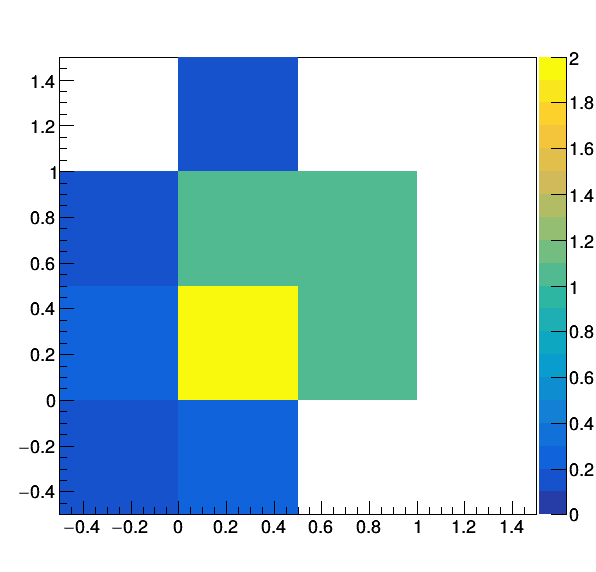

In [9]:
htest->GetXaxis()->SetRange(0,3);
htest->GetYaxis()->SetRange(0,3);
htest->Draw("colz");
c->Draw();

In [16]:
h2test->GetXaxis()->SetRange(1,2);
h2test->Integral()

(double) 5.300000


In [11]:
htest->GetEntries()

(double) 10.000000


In [12]:
htest->GetBinContent(0,0)

(double) 0.100000


Projection:

In [14]:
h2test->GetXaxis()->SetRange(0,3);
h2test->Integral()

(double) 5.700000


In [15]:
h2test->GetEntries()

(double) 5.562376


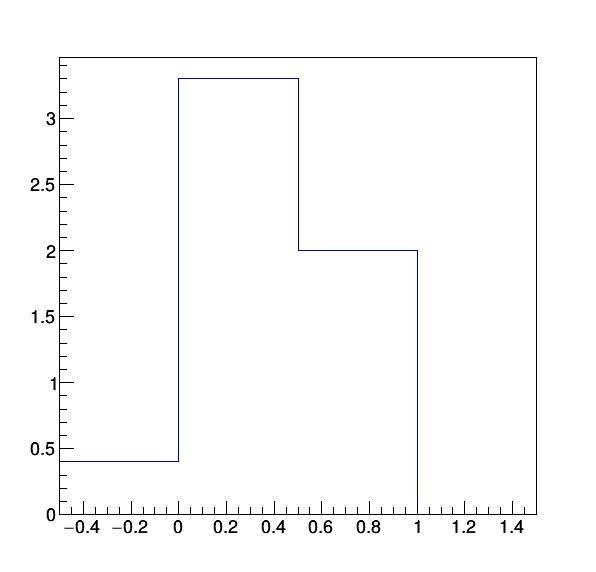

In [56]:
h2test = (TH1F *)htest->ProjectionX();
h2test->GetXaxis()->SetRange(0,3);
h2test->Draw();
c->Draw();